# Real Cost Function
## Mean Squared error: a cost function for rgression problems

## $RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$
## $MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2, or$
## $MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2$

In [105]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [106]:
#Make sample data
x = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() #transpose to 2 dimensional array
y = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1) #the same but with different method

print('Shape of x array:', x.shape)
print('Shape of y array:', y.shape)

Shape of x array: (7, 1)
Shape of y array: (7, 1)


In [107]:
#Quicl Linear Regression
regr = LinearRegression()
regr.fit(x, y)

print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


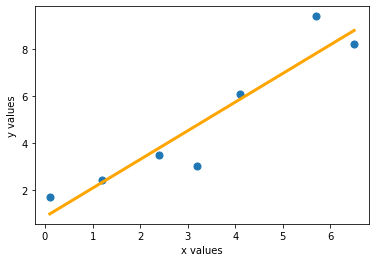

In [108]:
plt.scatter(x, y, s=50)
plt.plot(x, regr.predict(x), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [109]:
#y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x
print('Est values y_hat are:\n', y_hat)
print('In comperison, the actual y valies are:\n', y)

Est values y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comperison, the actual y valies are:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [110]:
def mse(y, y_hat):
    #return (1/y.size)*sum((y - y_hat)**2) #first method
    return np.average((y - y_hat)**2, axis=0)

In [111]:
print('Manually calculated MSE:', mse(y, y_hat))
print('Regression using manual calc is:', mean_squared_error(y, y_hat))
print('MSE regression is:', mean_squared_error(y, regr.predict(x)))

Manually calculated MSE: [0.94796558]
Regression using manual calc is: 0.9479655759794577
MSE regression is: 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [112]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc MSE using nested for loops

In [113]:
plot_cost = np.zeros((nr_thetas, nr_thetas)) #Creating array with 0
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x
        plot_cost[i][j]=mse(y, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


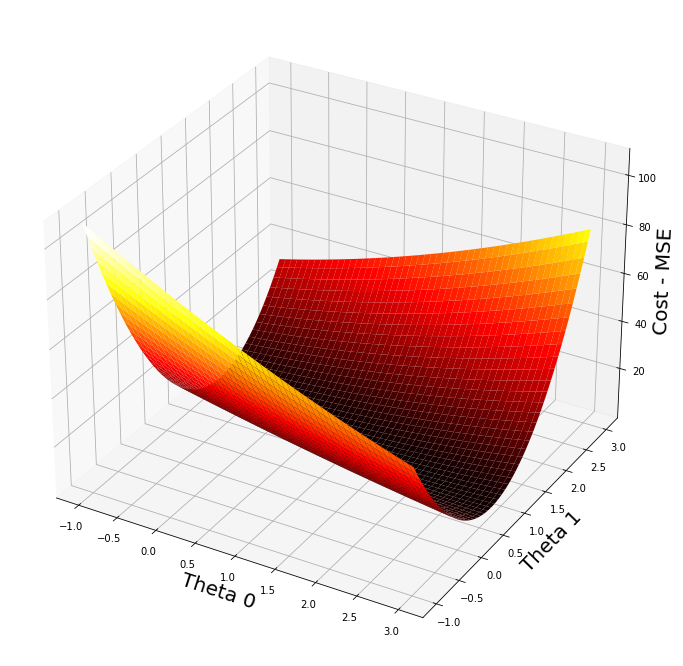

In [114]:
#Plotting MSE
fig = plt.figure(figsize=(16, 12))
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [115]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i, j)', ij_min)
print('Min MSE for Theta0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i, j) (111, 91)
Min MSE for Theta0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$
## $\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$
## $\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$

## MSE and Gradient Descent

In [116]:
# x value, y value, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
        n = y.size
        theta0_slope = (-2/n)*sum(y - thetas[0] - thetas[1]*x)
        theta1_slope = (-2/n)*sum((y - thetas[0] - thetas[1]*x)*x)
        
        #return np.array([theta0_slope[0], theta1_slope[0]])
        #return np.append(arr=theta0_slope, values=theta1_slope)
        return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [117]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

#Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y, thetas[0] + thetas[1]*x)

for i in range(1000):
    thetas = thetas - multiplier * grad(x, y, thetas)
    
    #Append the new values to numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y, thetas[0] + thetas[1]*x))

#Results
print('Min occurs at Theta0:', thetas[0])
print('Min occurs at Theta1:', thetas[1])
print('MSE is:', mse(y, thetas[0]+thetas[1]*x))

Min occurs at Theta0: 0.8532230461743415
Min occurs at Theta1: 1.2214935332607393
MSE is: [0.94797511]


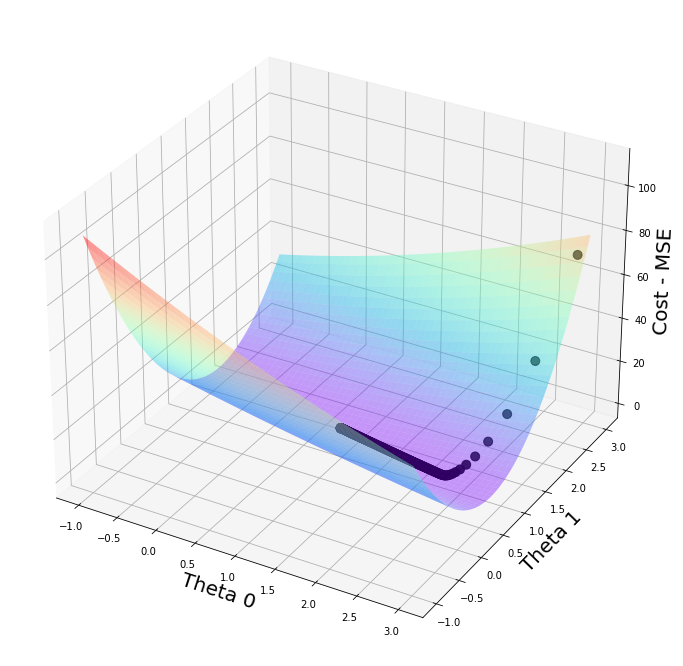

In [121]:
#Plotting MSE
fig = plt.figure(figsize=(16, 12))
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()